# 👩‍💻 Activité 1 : Comment récupérer des données ? - PARTIE 1 : fichiers de données

<img src="https://cdn.pixabay.com/photo/2016/11/30/15/00/apples-1872997_1280.jpg" alt="rubik" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Quels sont les 2 types de structures de données que peut contenir un fichier JSON ?
___
Les fichiers JSON peuvent contenir deux types de structures de données : les **dictionnaires** (objet JSON) et les **listes** (array JSON).

Source : https://www.json.org/json-fr.html
___
### - Quels sont les différences entre des données contenues dans les structures Python et dans des structures JSON ?
___
Les JSON sont issues de la **syntaxe Javascript**, il y a donc les **différences** suivantes entre la syntaxe **JSON** et la syntaxe **Python** :

|**Syntaxe JSON**|**Syntaxe Python**|
|-|-|
|true|True|
|false|False|
|null|None|
|object|dict|
|array|list, tuple|
|string|str|
|number|int, float|

La **bibliothèque standard** Python possède le module **[json](https://docs.python.org/fr/3/library/json.html)** pour traiter les fichiers JSON.

Source :

- https://docs.python.org/fr/3/library/json.html#encoders-and-decoders
___
### - Comment sont construits les fichiers GeoJSON et TopoJSON ?
___
Le fichier GeoJSON est un format d'encodage de **données géospatiales** en utilisant un fichier JSON. Le fichier TopoJSON encode les données geographiques de façon **plus condensée** que le fichier GeoJSON.

Source :

- https://fr.wikipedia.org/wiki/GeoJSON

- https://fr.wikipedia.org/wiki/TopoJSON
___
### - Quelles différences y a-t-il entre un fichier JSON et un fichier CSV ?
___
Le fichier **JSON** est un format **léger de stockage de données** très utilisé par les **API**. Le format CSV est **plus verbeux** de le JSON et il stocke les données sous un **format tabulaire** à l'aide d'un **caractère de séparation** des données. La **bibliothèque standard** Python possède le module **[csv](https://docs.python.org/3/library/csv.html)** pour traiter les fichiers CSV.

Source :

- https://docs.python.org/3/library/csv.html
___

## ✏️ Activités

Un processus d'**analyse de données** commence par une étape de **collecte de données**. Si les données ne sont pas trop volumineuses (< quelques Go de données), on importe les données dans un dataframe Pandas. Si les données sont trop volumineuses, il faudra passer à des technologies big data (Hadoop, Spark...).
Dans cette partie, on effectuera la collecte des données mais aussi le **traitement des valeurs manquantes** et les premières **visualisations de données**.

Dans cette partie, on va étudier le **prix de vente des carburants** dans les différentes **stations service de France**. La données peuvent être récupérées à cette url : https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-instantane/

Les données sont présentées **sous différents formats** (XML, CSV, JSON, GeoJSON, Shapefile). L'objectif de cette activité va être de récupérer les données de ces fichiers dans des **dataframes Pandas**.

<img src="https://cdn.pixabay.com/photo/2016/08/15/22/20/fuel-1596622_1280.jpg" alt="datagouv" width="400"/>

### 🥇 Fichiers CSV (Comma-separated values) 

Les **fichiers CSV** sont des fichiers au **format texte** contenant des données **séparées par des virgules**. Il existe des **variantes** utilisant d'**autres symboles** pour séparer les données (Delimiter-separated values - DSV) : le point virgule, la tabulation... Tous ces fichiers sont récupérables dans un dataframe Pandas grâce à la fonction [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) et au paramètre `sep` pour indiquer le délimiteur.

- Importer les bibliothèques Pandas, Matplotlib et Seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Récupérer les données du **fichier CSV** (https://www.data.gouv.fr/fr/datasets/r/64e02cff-9e53-4cb2-adfd-5fcc88b2dc09) dans un **dataframe Pandas**.

In [2]:
df = pd.read_csv("prix-carburants-fichier-instantane-test-ods-copie.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31851 entries, 0 to 31850
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       31851 non-null  int64  
 1   cp                       31851 non-null  int64  
 2   pop                      31851 non-null  object 
 3   adresse                  31851 non-null  object 
 4   ville                    31851 non-null  object 
 5   horaires                 23186 non-null  object 
 6   geom                     31851 non-null  object 
 7   prix_maj                 31465 non-null  object 
 8   prix_id                  31465 non-null  float64
 9   prix_valeur              31465 non-null  float64
 10  prix_nom                 31465 non-null  object 
 11  com_arm_code             31838 non-null  object 
 12  com_arm_name             31838 non-null  object 
 13  epci_code                31836 non-null  float64
 14  epci_name             

- Afficher la **proportion des valeurs manquantes par colonne**.

In [3]:
(df.isna().sum()/df.shape[0]*100).round(2)

id                          0.00
cp                          0.00
pop                         0.00
adresse                     0.00
ville                       0.00
horaires                   27.20
geom                        0.00
prix_maj                    1.21
prix_id                     1.21
prix_valeur                 1.21
prix_nom                    1.21
com_arm_code                0.04
com_arm_name                0.04
epci_code                   0.05
epci_name                   0.05
dep_code                    0.04
dep_name                    0.04
reg_code                    0.04
reg_name                    0.04
com_code                    0.04
com_name                    0.04
services_service            7.94
horaires_automate_24_24     0.00
dtype: float64

- Tracer le **graphique des valeurs manquantes** grâce à la bibliothèque Seaborn pour pouvoir les **localiser** (https://seaborn.pydata.org/generated/seaborn.heatmap.html). Analyser la **corrélation des valeurs manquantes**. Quelle conclusion en tirer sur le nettoyage des données ?

> ℹ️ La localisation des valeurs manquantes est aussi possible avec la bibliothèque [Missingno](https://github.com/ResidentMario/missingno) spécialisée dans l'analyse des données manquantes

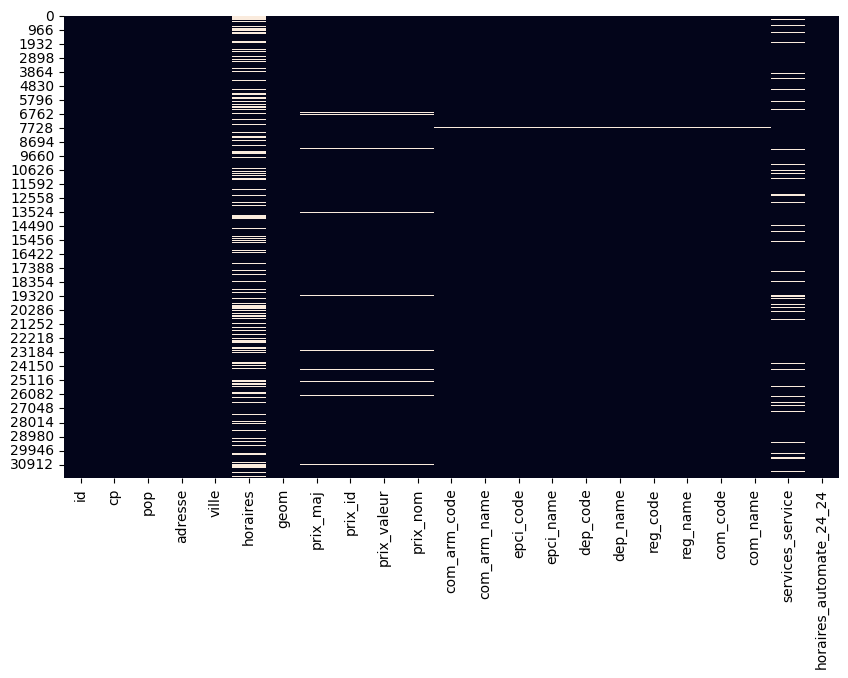

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.show()

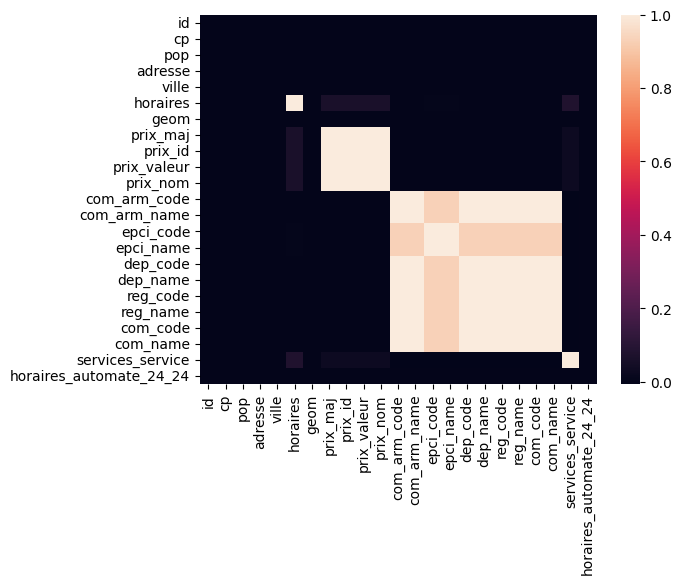

In [5]:
sns.heatmap(df.isna().corr().fillna(0))
plt.show()

On oberve **deux groupes** de données où les valeurs manquantes sont **très corrélées**. Au vu de la **faible proportion de données manquantes** et de leur **forte corrélation**, on peut **supprimer ces lignes de données**.

- Supprimer certaines **données manquantes** suite aux conclusions précédentes et réindexer les données (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). Tracer le **graphique des données manquantes** pour **valider le bon traitement** 

In [6]:
drop_df = df.dropna(how="any", subset=[
    "prix_maj", "prix_id", "prix_valeur", "prix_nom", "com_arm_code",
    "com_arm_name", "epci_code", "epci_name", "dep_code", "dep_name",
    "reg_code", "reg_name", "com_code", "com_name",
])
drop_df = drop_df.reset_index()

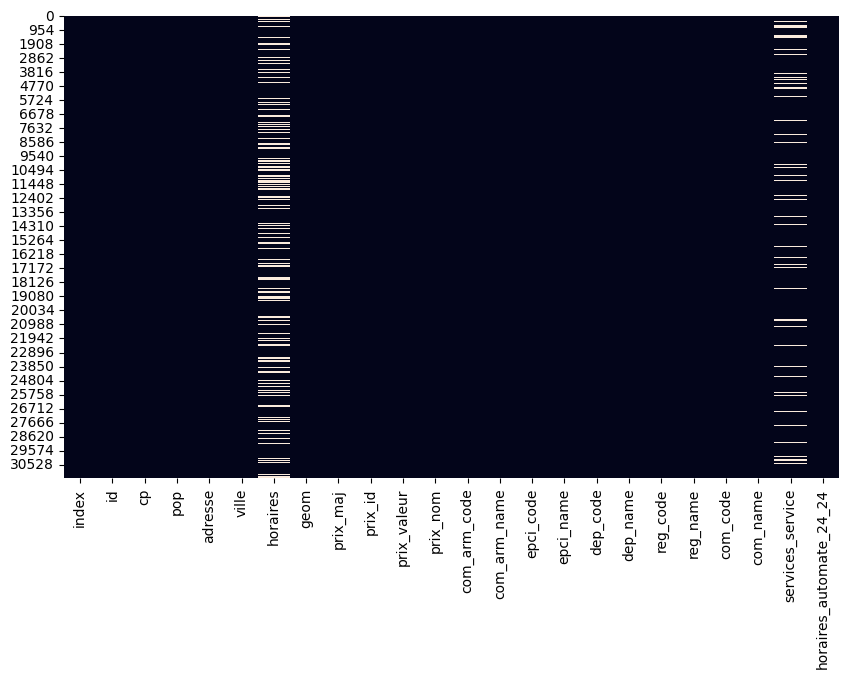

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(drop_df.isna(), cbar=False)
plt.show()

### 🥇 Fichiers JSON (JavaScript Object Notation) 

Les **fichiers JSON** sont des fichiers au **format texte**. Il existe aussi 2 sous familles de fichiers **JSON** spécialisés pour la manipulation de **données géographiques** : [GeoJSON](https://fr.wikipedia.org/wiki/GeoJSON) et [TopoJSON](https://fr.wikipedia.org/wiki/TopoJSON)

- Récupérer les données du **fichier JSON** (https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-instantane/) dans un **dataframe Pandas**.

In [8]:
df_json = pd.read_json("https://www.data.gouv.fr/fr/datasets/r/b3393fc7-1bee-42fb-a351-d7aedf5d5ff0")
df_json

,datasetid,recordid,fields,geometry,record_timestamp
0,prix-carburants-fichier-instantane-test-ods-copie,a4d193d7a8a295a3722119fdccb35901a4dc0d89,"{'ville': 'Charvieu-Chavagneux', 'pop': 'R', '...","{'type': 'Point', 'coordinates': [5.1454721548...",NaN
1,prix-carburants-fichier-instantane-test-ods-copie,1fe6c9032c38cf42173843d81bf09ee4c7892b1d,"{'ville': 'ANICHE', 'pop': 'R', 'reg_name': 'H...","{'type': 'Point', 'coordinates': [3.24294, 50....",NaN
2,prix-carburants-fichier-instantane-test-ods-copie,ed2db5279bb4e2c1a8b9a4489b65fb391ad3ffc4,"{'ville': 'Savigneux', 'pop': 'R', 'reg_name':...","{'type': 'Point', 'coordinates': [4.08929, 45....",NaN
3,prix-carburants-fichier-instantane-test-ods-copie,3187b32f056f6f276801be64b174b3467471307d,"{'ville': 'Savigneux', 'pop': 'R', 'reg_name':...","{'type': 'Point', 'coordinates': [4.08929, 45....",NaN
4,prix-carburants-fichier-instantane-test-ods-copie,8f5e68dbd9a44740ffedced60f805610919cc063,"{'ville': 'CROZON', 'pop': 'R', 'reg_name': 'B...","{'type': 'Point', 'coordinates': [-4.4194473, ...",NaN
...,...,...,...,...,...
32348,prix-carburants-fichier-instantane-test-ods-copie,7f9f2a8ac1fcd911e3d016a0b3fec4bc28d09876,"{'ville': 'Vézénobres', 'pop': 'R', 'reg_name'...","{'type': 'Point', 'coordinates': [4.145, 44.045]}",NaN
32349,prix-carburants-fichier-instantane-test-ods-copie,c315a431f18e59636425d25462631ed0cb50d194,"{'ville': 'Angoulême', 'pop': 'R', 'reg_name':...","{'type': 'Point', 'coordinates': [0.181, 45.658]}",NaN
32350,prix-carburants-fichier-instantane-test-ods-copie,6a3446f90b5820e555de41b2fece04fe505369f8,"{'ville': 'Farébersviller', 'pop': 'R', 'reg_n...","{'type': 'Point', 'coordinates': [6.856, 49.11]}",NaN
32351,prix-carburants-fichier-instantane-test-ods-copie,e024b098908e755e0401e3fc05b3a87e9e84fa05,"{'ville': 'LA SUZE-SUR-SARTHE', 'pop': 'R', 'r...","{'type': 'Point', 'coordinates': [0.047, 47.892]}",NaN


- Séparer les différentes données de la **colonne "fields"** grâce à la fonction de Pandas [`json_normalize()`](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html)

In [9]:
df_json = pd.json_normalize(df_json["fields"])

- Analyser **statistiquement** et **graphiquement** la colonne "prix_valeur". Quelle **conclusion** faites-vous à partir de la **distribution des données** ? Valider cette conclusion statistiquement et graphiquement 

In [10]:
df_json[["prix_valeur"]].describe()

,prix_valeur
count,31982.000000
mean,1.674914
std,0.323595
min,0.536000
25%,1.692000
50%,1.778000
75%,1.835000
max,7.699000


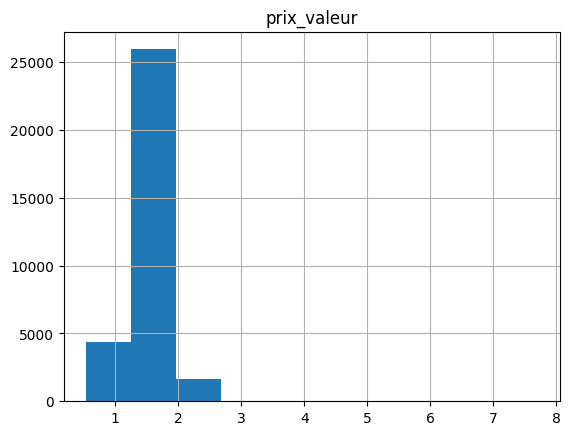

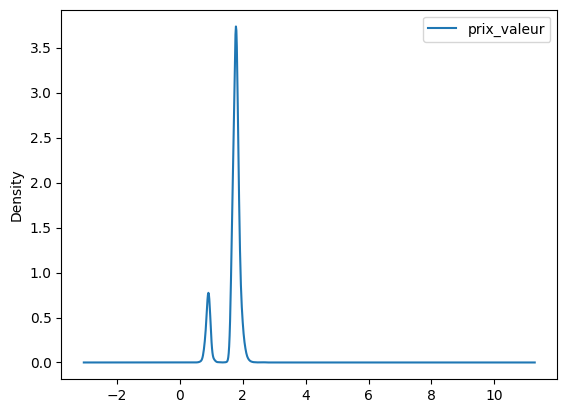

In [11]:
df_json[["prix_valeur"]].hist()
df_json[["prix_valeur"]].plot.kde()
plt.show()

La distribution présente **deux modalités** sûrement à cause des **différents types de carburants**.

In [12]:
df_json[["prix_nom", "prix_valeur"]].groupby(["prix_nom"]).agg(["mean", "std"])

prix_valeur          
                mean       std
prix_nom                      
E10         1.714736  0.107816
E85         0.911550  0.076382
GPLc        0.901581  0.115915
Gazole      1.850809  0.078500
SP95        1.775936  0.088778
SP98        1.815850  0.089660

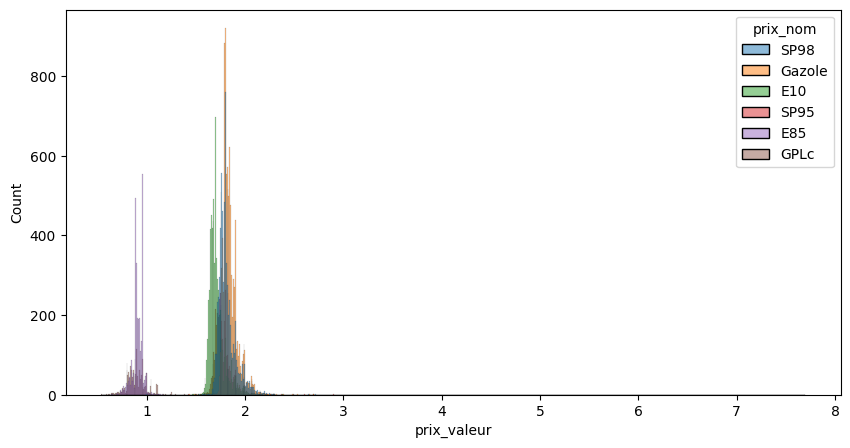

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_json, x="prix_valeur", hue="prix_nom")
plt.show()

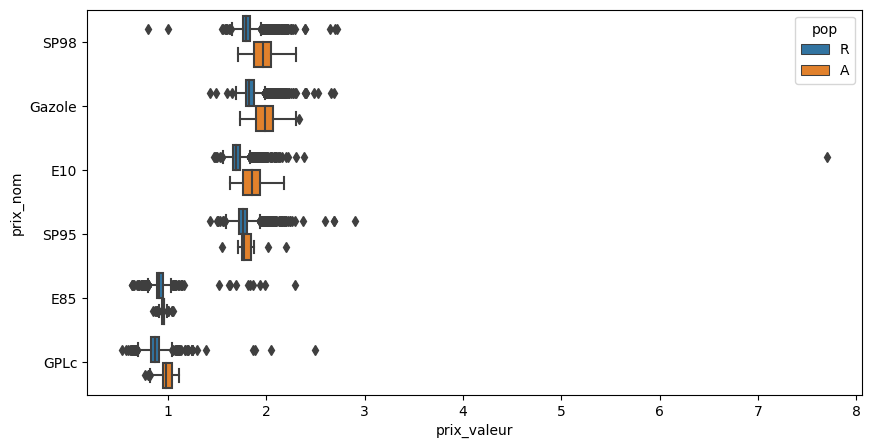

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_json, x="prix_valeur", y="prix_nom", hue="pop")
plt.show()

### 🥈 Fichiers GeoJSON () 

Les **fichiers GeoJSON** sont des fichiers JSON avec un **formalisme spécifique** pour stocker des **données géographiques** donc ils peuvent contenir à la fois des **données "métier"** et des **données géographiques**.

- Récupérer les données du **fichier GeoJSON** (https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-instantane/) dans un **dataframe Pandas**.

In [15]:
df_geojson = pd.read_json("https://www.data.gouv.fr/fr/datasets/r/b9a8d9cb-4dcf-41cc-b66e-dc0b49cd21d4")
df_geojson

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
...,...,...
32348,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
32349,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
32350,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
32351,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


- Afficher le contenu de la **colonne "features"** dans un dataframe grâce à la fonction de Pandas [`json_normalize()`](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html) et retrouver les différentes parties d'un GeoJSON ("type", "geometry" et "properties")

In [16]:
pd.json_normalize(df_geojson["features"])

,type,geometry.type,geometry.coordinates,properties.ville,properties.pop,properties.reg_name,properties.com_arm_code,properties.dep_name,properties.prix_nom,properties.com_code,...,properties.com_arm_name,properties.prix_maj,properties.id,properties.reg_code,properties.adresse,properties.geom,properties.epci_code,properties.cp,properties.prix_valeur,properties.com_name
0,Feature,Point,"[5.145472154846, 45.750848857429]",Charvieu-Chavagneux,R,Auvergne-Rhône-Alpes,38085,Isère,SP98,38085,...,Charvieu-Chavagneux,2022-12-03T09:28:45+01:00,38230005,84,ROUTE DES PERVES,"[45.750848857429, 5.145472154846]",243800935,38230,1.799,Charvieu-Chavagneux
1,Feature,Point,"[3.24294, 50.33003]",ANICHE,R,Hauts-de-France,59008,Nord,Gazole,59008,...,Aniche,2022-12-03T17:27:46+01:00,59580001,32,67 Boulevard Paul Vaillant-Couturier,"[50.33003, 3.24294]",245901152,59580,1.795,Aniche
2,Feature,Point,"[4.08929, 45.60844]",Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,Gazole,42299,...,Savigneux,2022-11-29T10:19:56+01:00,42600003,84,ROUTE DE LYON,"[45.60844, 4.08929]",200065886,42600,1.799,Savigneux
3,Feature,Point,"[4.08929, 45.60844]",Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,E10,42299,...,Savigneux,2022-11-29T10:19:56+01:00,42600003,84,ROUTE DE LYON,"[45.60844, 4.08929]",200065886,42600,1.699,Savigneux
4,Feature,Point,"[-4.4194473, 48.2482909]",CROZON,R,Bretagne,29042,Finistère,SP95,29042,...,Crozon,2022-12-02T10:24:15+01:00,29160004,53,TAL AR GROAS,"[48.2482909, -4.4194473]",200066868,29160,1.694,Crozon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32348,Feature,Point,"[4.145, 44.045]",Vézénobres,R,Occitanie,30348,Gard,SP98,30348,...,Vézénobres,2022-11-23T17:33:17+01:00,30360002,76,372 CHEMIN DE LA ROUVIERETTE,"[44.045, 4.145]",200066918,30360,1.829,Vézénobres
32349,Feature,Point,"[0.181, 45.658]",Angoulême,R,Nouvelle-Aquitaine,16015,Charente,SP98,16015,...,Angoulême,2022-12-01T08:55:00+01:00,16021001,75,5 avenue Paul Desfarges,"[45.658, 0.181]",200071827,16000,1.689,Angoulême
32350,Feature,Point,"[6.856, 49.11]",Farébersviller,R,Grand Est,57207,Moselle,Gazole,57207,...,Farébersviller,2022-12-01T01:01:00+01:00,57450003,44,63 avenue Saint Jean,"[49.11, 6.856]",245700398,57450,1.859,Farébersviller
32351,Feature,Point,"[0.047, 47.892]",LA SUZE-SUR-SARTHE,R,Pays de la Loire,72346,Sarthe,Gazole,72346,...,La Suze-sur-Sarthe,2022-12-02T10:07:33+01:00,72210001,52,Route des Trunetières,"[47.892, 0.047]",247200629,72210,1.779,La Suze-sur-Sarthe


- Installer dans l'**environnement virtuel** et importer la bibliothèque [GeoPandas](https://geopandas.org/en/stable/) 

> ℹ️ La bibliothèque **GeoPandas** est une bibliothèque de **manipulation de données cartographiques** en Python. Elle permet de manipuler des GeoDataFrames et des GeoSeries pour effectuer des calculs sur les données géographiques.

In [17]:
import geopandas

- Récupérer le **fichier GeoJSON** de la **région** de votre choix sur ce site : https://france-geojson.gregoiredavid.fr/. Créer un **geoDataFrame** de ces données

In [18]:
url_geojson_aura = "https://france-geojson.gregoiredavid.fr/repo/regions/auvergne-rhone-alpes/region-auvergne-rhone-alpes.geojson"
aura_gdf = geopandas.read_file(url_geojson_aura)
aura_gdf

,code,nom,geometry
0,84,Auvergne-Rhône-Alpes,"POLYGON ((3.36135 44.97141, 3.35453 44.95482, ..."


- Récupérer les données du **fichier GeoJSON** (https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-instantane/) dans un **Geodataframe GeoPandas**.

In [19]:
gdf = geopandas.read_file("https://www.data.gouv.fr/fr/datasets/r/b9a8d9cb-4dcf-41cc-b66e-dc0b49cd21d4")
gdf

,ville,pop,reg_name,com_arm_code,dep_name,prix_nom,com_code,epci_name,dep_code,services_service,...,com_arm_name,prix_maj,id,reg_code,adresse,epci_code,cp,prix_valeur,com_name,geometry
0,Charvieu-Chavagneux,R,Auvergne-Rhône-Alpes,38085,Isère,SP98,38085,CC Lyon Saint Exupéry en Dauphiné,38,Laverie//Boutique alimentaire//Carburant addit...,...,Charvieu-Chavagneux,2022-12-03 08:28:45+00:00,38230005,84,ROUTE DES PERVES,243800935,38230,1.799,Charvieu-Chavagneux,POINT (5.14547 45.75085)
1,ANICHE,R,Hauts-de-France,59008,Nord,Gazole,59008,CC Cœur d'Ostrevent,59,Toilettes publiques//Station de gonflage//Carb...,...,Aniche,2022-12-03 16:27:46+00:00,59580001,32,67 Boulevard Paul Vaillant-Couturier,245901152,59580,1.795,Aniche,POINT (3.24294 50.33003)
2,Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,Gazole,42299,CA Loire Forez Agglomération,42,Laverie//Vente de pétrole lampant//Carburant a...,...,Savigneux,2022-11-29 09:19:56+00:00,42600003,84,ROUTE DE LYON,200065886,42600,1.799,Savigneux,POINT (4.08929 45.60844)
3,Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,E10,42299,CA Loire Forez Agglomération,42,Laverie//Vente de pétrole lampant//Carburant a...,...,Savigneux,2022-11-29 09:19:56+00:00,42600003,84,ROUTE DE LYON,200065886,42600,1.699,Savigneux,POINT (4.08929 45.60844)
4,CROZON,R,Bretagne,29042,Finistère,SP95,29042,CC Presqu'île de Crozon-Aulne maritime,29,Laverie//Boutique alimentaire//Boutique non al...,...,Crozon,2022-12-02 09:24:15+00:00,29160004,53,TAL AR GROAS,200066868,29160,1.694,Crozon,POINT (-4.41945 48.24829)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32348,Coudekerque-Branche,R,Hauts-de-France,59155,Nord,Gazole,59155,CU de Dunkerque,59,Boutique alimentaire//Carburant additivé//Lava...,...,Coudekerque-Branche,2022-12-04 00:01:00+00:00,59210005,32,14 ROUTE DE FURNES,245900428,59210,1.792,Coudekerque-Branche,POINT (2.39374 51.03170)
32349,Cambrai,R,Hauts-de-France,59122,Nord,Gazole,59122,CA de Cambrai,59,None,...,Cambrai,2022-12-03 05:16:00+00:00,59400003,32,491 Rue de Landrecies,200068500,59400,1.843,Cambrai,POINT (3.24800 50.17500)
32350,BOURBOURG,R,Hauts-de-France,59094,Nord,None,59094,CU de Dunkerque,59,Boutique non alimentaire//Vente de fioul domes...,...,Bourbourg,NaT,59630001,32,3 RUE JACQUES VARLET,245900428,59630,NaN,Bourbourg,POINT (2.19300 50.94100)
32351,Compiègne,R,Hauts-de-France,60159,Oise,Gazole,60159,CA de la Région de Compiègne et de la Basse Au...,60,None,...,Compiègne,2022-12-01 17:19:00+00:00,60200005,32,20 Rue de Clermont,200067965,60200,1.914,Compiègne,POINT (2.82000 49.41900)


- Effectuer une **jointure** entre les deux **GeoDataFrame** à l'aide de la fonction [`sjoin()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html#geopandas.sjoin) de GeoPandas pour ne conserver que les stations de la région choisie

In [20]:
aura_gdf_small = geopandas.sjoin(gdf, aura_gdf)
aura_gdf_small = aura_gdf_small.reset_index(drop=True)
aura_gdf_small

,ville,pop,reg_name,com_arm_code,dep_name,prix_nom,com_code,epci_name,dep_code,services_service,...,reg_code,adresse,epci_code,cp,prix_valeur,com_name,geometry,index_right,code,nom
0,Charvieu-Chavagneux,R,Auvergne-Rhône-Alpes,38085,Isère,SP98,38085,CC Lyon Saint Exupéry en Dauphiné,38,Laverie//Boutique alimentaire//Carburant addit...,...,84,ROUTE DES PERVES,243800935,38230,1.799,Charvieu-Chavagneux,POINT (5.14547 45.75085),0,84,Auvergne-Rhône-Alpes
1,Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,Gazole,42299,CA Loire Forez Agglomération,42,Laverie//Vente de pétrole lampant//Carburant a...,...,84,ROUTE DE LYON,200065886,42600,1.799,Savigneux,POINT (4.08929 45.60844),0,84,Auvergne-Rhône-Alpes
2,Savigneux,R,Auvergne-Rhône-Alpes,42299,Loire,E10,42299,CA Loire Forez Agglomération,42,Laverie//Vente de pétrole lampant//Carburant a...,...,84,ROUTE DE LYON,200065886,42600,1.699,Savigneux,POINT (4.08929 45.60844),0,84,Auvergne-Rhône-Alpes
3,TULLINS,R,Auvergne-Rhône-Alpes,38517,Isère,E10,38517,CA du Pays Voironnais,38,Station de gonflage//Vente de gaz domestique (...,...,84,Avenue de la Contamine,243800984,38210,1.725,Tullins,POINT (5.48762 45.29804),0,84,Auvergne-Rhône-Alpes
4,Villars,R,Auvergne-Rhône-Alpes,42330,Loire,SP98,42330,Saint-Etienne Métropole,42,Station de gonflage//Piste poids lourds//Vente...,...,84,Chemin de Montravel,244200770,42390,1.778,Villars,POINT (4.34400 45.47600),0,84,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,AMBéRIEU-EN-BUGEY,R,Auvergne-Rhône-Alpes,01004,Ain,SP95,01004,CC de la Plaine de l'Ain,01,Toilettes publiques//Boutique alimentaire//Bou...,...,84,15 Avenue de la Libération,240100883,01500,1.929,Ambérieu-en-Bugey,POINT (5.33285 45.95700),0,84,Auvergne-Rhône-Alpes
4042,Montélier,R,Auvergne-Rhône-Alpes,26197,Drôme,Gazole,26197,CA Valence Romans Agglo,26,Vente de fioul domestique//Lavage manuel//Vent...,...,84,Les Champs,200068781,26120,1.839,Montélier,POINT (5.02200 44.92900),0,84,Auvergne-Rhône-Alpes
4043,LA BOURBOULE,R,Auvergne-Rhône-Alpes,63047,Puy-de-Dôme,SP98,63047,CC du Massif du Sancy,63,"Vente de gaz domestique (Butane, Propane)//DAB...",...,84,BOULEVARD DES VERNIERES,246300966,63150,1.895,La Bourboule,POINT (2.75800 45.59100),0,84,Auvergne-Rhône-Alpes
4044,Saint-Didier-sous-Aubenas,R,Auvergne-Rhône-Alpes,07229,Ardèche,Gazole,07229,CC du Bassin d'Aubenas,07,Aire de camping-cars//Piste poids lourds//Vent...,...,84,Rue de Montélimar,200073245,07200,1.849,Saint-Didier-sous-Aubenas,POINT (4.40900 44.61200),0,84,Auvergne-Rhône-Alpes


- Sélectionner uniquement les **stations d'autoroute** (utiliser la colonne "pop")

In [21]:
aura_gdf_small = aura_gdf_small[aura_gdf_small["pop"]=="A"]

- **Exporter** le GeoDataFrame obtenu sous forme d'un fichier GeoJSON grâce à la méthode de GeoDataFrame [`to_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html)

In [22]:
aura_gdf_small.to_file('aura_autoroute.geojson', driver='GeoJSON')

- Installer dans l'**environnement virtuel** et importer la bibliothèque [Folium](https://python-visualization.github.io/folium/) 

> ℹ️ La bibliothèque **Folium** est une des bibliothèques de **cartographie** en Python. Il s'agit d'un **"wrapper"** sur la bibliothèque Javascript [Leaflet.js](https://leafletjs.com/)

In [23]:
import folium

- Créer un **carte Folium vide** centrée sur le **centre de la France** (latitude : 46.227638, longitude : 2.213749) et avec un zoom de 6 (https://python-visualization.github.io/folium/quickstart.html)

In [24]:
m = folium.Map(location=[46.227638, 2.213749], zoom_start=6)
m

- Essayer d'afficher grâce l'object `GeoJson` de Folium toutes les stations services des autoroute de la région choisie à partir du fichier **GeoJSON créé précédemment**

In [25]:
folium.GeoJson('aura_autoroute.geojson', name="geojson").add_to(m)
m

### 🥈 Fichiers XML (Extensible Markup Language) 

Les **fichiers XML** sont des fichiers au **format texte**. Tous ces fichiers sont récupérables dans un dataframe Pandas grâce à la fonction [`read_xml()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_xml.html). Pour fonctionner correctement, la bibliothèque `lxml` doit être installée dans l'environnement virtuel.

- Récupérer les données d'un des **fichiers XML** (https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-instantane/) dans un **dataframe Pandas**.

> ℹ️ Lors de l'utilisation de fonctions d'importation de données avec Pandas, il peut y avoir des erreurs dues à l'**encodage des données**. L'encodage "classique" d'un texte est l'**utf-8** mais il en existe beaucoup d'autres (ascii, utf-16, utf-32...) qui permettent de visualiser les différents alphabets ou encore les émojis. Dans les fonctions de Pandas, il faut en général utiliser le paramètre `encoding` pour définir l'encodage.

In [107]:
df_xml = pd.read_xml(
    "PrixCarburants_instantane.xml",
    encoding="ISO-8859-1",
)
df_xml

,id,latitude,longitude,cp,pop,adresse,ville,horaires,services,prix
0,38580003,4.538682e+06,606860.222171,38580,R,Route de Montouvrard,ALLEVARD,NaN,NaN,NaN
1,13270005,4.346484e+06,494014.000000,13270,R,Avenue Georges Pompidou,Fos-sur-Mer,NaN,NaN,NaN
2,60400001,4.957117e+06,297854.000000,60400,R,Z.a.c. Mont-Renaud,NOYON,NaN,NaN,NaN
3,75016001,4.884700e+06,225600.000000,75016,R,1 Avenue du Général Sarrail,PARIS,NaN,NaN,NaN
4,95350002,4.900763e+06,235163.000000,95350,R,20 avenue robert schumann,SAINT-BRICE-SOUS-FORêT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9989,63430002,4.578800e+06,326800.000000,63430,R,64 AVENUE DE LYON,Pont-du-Château,NaN,NaN,NaN
9990,17137001,4.619800e+06,-115800.000000,17137,R,44 Avenue de la Rochelle,NIEUL-SUR-MER,NaN,NaN,NaN
9991,13870002,4.389700e+06,479400.000000,13870,R,30 Avenue Joseph Callet,ROGNONAS,NaN,NaN,NaN
9992,79200006,4.664100e+06,-26200.000000,79200,R,20 Boulevard Georges Clemenceau,PARTHENAY,NaN,NaN,NaN


- Vérifier que les **prix ont bien été récupérés** dans le dataframe. Si ce n'est pas le cas, essayer de construire le dataframe à partir de la **bibliothèque standard [`xml.etree.ElementTree`](https://docs.python.org/3/library/xml.etree.elementtree.html)**.

In [99]:
import xml.etree.ElementTree as ET

In [110]:
df_xml_2 = pd.DataFrame(columns=["id", "latitude", "longitude", "pop", "nom", "maj", "valeur"])

In [111]:
tree = ET.parse('PrixCarburants_instantane.xml')
root = tree.getroot()
temp_dic = {"id":[], "latitude":[], "longitude":[], "pop":[], "nom":[], "maj":[], "valeur":[]}
for child in root:
    for elt in child:
        if elt.tag=="prix":
            for name in ["id", "latitude", "longitude", "pop"]:
                temp_dic[name].append(child.attrib[name])
            for name in ["nom", "maj", "valeur"]:
                temp_dic[name].append(elt.attrib[name])
df_xml_2 = pd.DataFrame(temp_dic)
df_xml_2

,id,latitude,longitude,pop,nom,maj,valeur
0,38580003,4538682.1519174,606860.22217104,R,Gazole,2022-11-24 09:24:18,1.894
1,38580003,4538682.1519174,606860.22217104,R,E10,2022-11-24 09:24:18,1.759
2,38580003,4538682.1519174,606860.22217104,R,SP98,2022-11-24 09:24:18,1.899
3,13270005,4346484,494014,R,Gazole,2022-11-22 03:50:02,1.863
4,13270005,4346484,494014,R,E85,2022-11-22 03:50:02,0.959
...,...,...,...,...,...,...,...
31440,79200006,4664100,-26200,R,SP98,2022-11-26 07:15:13,1.899
31441,17100005,4574600,-67400,R,Gazole,2022-11-28 09:22:22,1.766
31442,17100005,4574600,-67400,R,SP95,2022-11-25 10:09:43,1.659
31443,17100005,4574600,-67400,R,E10,2022-11-25 10:09:44,1.611


- Calculer la **moyenne** des carburants par **carburants** et par **types de stations**

In [120]:
df_xml_2["valeur"] = df_xml_2["valeur"].astype("float")

In [121]:
df_xml_2[["nom", "pop", "valeur"]].groupby(["nom", "pop"]).mean()

valeur
nom    pop          
E10    A    1.841329
       R    1.714979
E85    A    0.942327
       R    0.916724
GPLc   A    0.994859
       R    0.870647
Gazole A    1.982633
       R    1.871620
SP95   A    1.822833
       R    1.796635
SP98   A    1.955574
       R    1.820507

### 🥇 Fichiers de tableur (Excel, Open Office...)

Les **fichiers de tableurs** sont très souvent utilisés. La bibliothèque **Pandas** possède la fonction [`pandas.read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) qui permet de lire ces fichiers.

> ℹ️ La bibliothèque Pandas a besoin de la bibliothèque [openpyxl](https://openpyxl.readthedocs.io/en/stable/) pour fonctionner, il faut donc l'installer.

- Récupérer dans un **dataframe Pandas** les données des musées des communes de France à cette url au format Excel [Liste des Musées de France (dernière version 2022)](https://www.data.gouv.fr/fr/datasets/liste-et-localisation-des-musees-de-france/)

In [95]:
df_musee = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/1796dfc3-fa33-4539-a14b-199eaa7a7b4a")
df_musee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Identifiant Muséofile  1221 non-null   object 
 1   Région administrative  1221 non-null   object 
 2   Département            1221 non-null   object 
 3   Commune                1221 non-null   object 
 4   Nom officiel du musée  1221 non-null   object 
 5   Adresse                1157 non-null   object 
 6   Lieu                   517 non-null    object 
 7   Code Postal            1220 non-null   float64
 8   Téléphone              1195 non-null   object 
 9   URL                    1137 non-null   object 
 10  Latitude               1221 non-null   float64
 11  Longitude              1221 non-null   float64
 12  REF_Deps               1210 non-null   object 
dtypes: float64(3), object(10)
memory usage: 124.1+ KB


- Grâce à la bibliothèque **Folium** et au dataframe créé précédemment, afficher les **musées de France** sur une carte sous forme de cercles [`folium.vector_layers.CircleMarker()`](https://python-visualization.github.io/folium/modules.html#folium.vector_layers.CircleMarker) avec un **popup** qui affiche le nom du musée quand on clique sur un cercle

In [98]:
m = folium.Map(location=[46.227638, 2.213749], zoom_start=6)
df_musee.apply(
    lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], radius=2, popup=row["Nom officiel du musée"]).add_to(m),
    axis=1,
)
m

## 🚀 Pour aller plus loin

- From XML to Pandas dataframes : https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c
- CSV Files in Python || Python Tutorial || Learn Python Programming : https://www.youtube.com/watch?v=Xi52tx6phRU&t=460s


___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par lumix2004 de Pixabay, Image par IADE-Michoko de Pixabay